# Pyber Analysis

- Observation 1: Assuming that population density with rural cities is less than suburban cities, and population density in suburban cities is less than urban cities, there seems to be a general trend that shows that as the population increase, the number of rides taken also increase, but the fare is smaller. This means that the larger the population, the more people request rides, but also that shorter distance they will travel. This means that if Pyber is trying to maximize revenue, they should perhaps offer rides to rural passengers at a lower per ride cost, but a higher per mile or per minute cost. Alternatively, they should offer riders to urban passengers at a higher per ride cost, but a lower per mile or per minute cost. Suburban drivers should be offered rides at a rate somewhere in between.
- Observation 2: There are vastly more urban drivers in proportion to the number of fares or rides given by urban drivers. This may suggest that in urban cities, Pyber has saturated the market and they are crowding each other out. It could also mean that in suburban and rural markets, there could be room to expand its operations.
- Observation 3: The top 15 cities by ride count are predominantly Urban Cities (14/15). However, the one exception is Port James, which is a suburban city and has offered 32 rides at 31.81 per ride. It seems like Pyber should some of the unique factors of Port James, and try to make in roads into similar cities to increase suburban visibility.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Import Files
ride_file = "raw_data/ride_data.csv"
city_file = "raw_data/city_data1.csv"

rideDF = pd.read_csv(ride_file)
cityDF = pd.read_csv(city_file)
# rideDF.head()

In [3]:
# Add Port James Values
cityDF.head()
cityDF0 = cityDF.groupby(['city'])
drivers = cityDF0['driver_count'].sum()
drivers
cityDF1 = pd.DataFrame({"driver_count": drivers})
cityDF1 = cityDF1.reset_index()
cityDF1
cityDF2 = cityDF.drop_duplicates(['city'])
cityDF2
cityDF = pd.merge(cityDF1, cityDF2, on="city", how="outer")
cityDF = cityDF.drop('driver_count_y', axis = 1)
cityDF = cityDF.rename(columns={"driver_count_x": "driver_count"})
# cityDF.head()

In [4]:
mergedDF = pd.merge(rideDF, cityDF, on = "city", how="left")
mergedCity = mergedDF.groupby(['city'])

# mergedCity.count()

In [5]:
rideCount = mergedCity['driver_count'].value_counts()
# rideCount.head()

In [6]:
averageFare = mergedCity['fare'].mean().round(2)
# averageFare.head()

In [7]:
fareDF = pd.DataFrame({"Average Fare": averageFare})
fareDF = fareDF.reset_index()
# fareDF.head()

In [8]:
rideCountDF = pd.DataFrame({"Ride Count": rideCount})
rideCountDF = rideCountDF.reset_index()
# rideCountDF.head()

In [9]:
cityRide = pd.merge(rideCountDF, fareDF, on='city', how='right')
# cityRide.head()

In [10]:
summaryTable = pd.merge(cityRide, cityDF, on='city', how='outer')
summaryTable = summaryTable.drop('driver_count_y', axis = 1)
summaryTable = summaryTable.rename(columns={"driver_count_x": "Driver Count"})
summaryTable = summaryTable.sort_values("Ride Count", ascending = False)
summaryTable.head(15)

,city,Driver Count,Ride Count,Average Fare,type
73,Port Johnstad,22,34,25.88,Urban
100,Swansonbury,64,34,27.46,Urban
94,South Louis,12,32,27.09,Urban
72,Port James,18,32,31.81,Suburban
0,Alvarezhaven,21,31,23.93,Urban
121,Williamshire,70,31,26.99,Urban
117,West Peter,61,31,24.88,Urban
5,Arnoldview,41,31,25.11,Urban
28,Jacobfort,52,31,24.78,Urban
108,West Brandy,12,30,24.16,Urban


In [11]:
# urban data only
urban = summaryTable.loc[summaryTable['type']=="Urban"]
# urban.head()

In [12]:
# suburban data only
suburban = summaryTable.loc[summaryTable['type']=="Suburban"]
# suburban.head()

In [13]:
# rural data only
rural = summaryTable.loc[summaryTable['type']=="Rural"]
# rural.head()

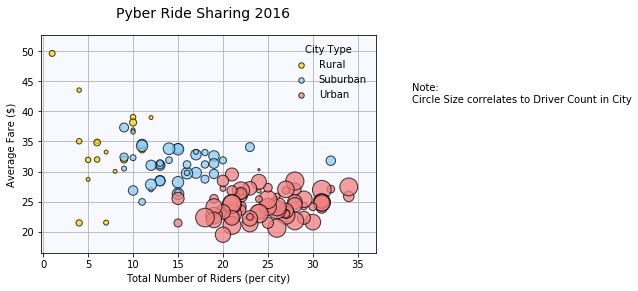

In [14]:
# Your objective is to build a Bubble Plot that showcases the relationship between four key variables:

# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)

fig, ax = plt.subplots()
# grids

ax.grid(True)
ax.set_axisbelow(True)
ax.set_facecolor('ghostwhite')

#plot points
ruralplot = ax.scatter(rural['Ride Count'], rural['Average Fare'], marker="o", facecolors="gold", 
                        edgecolors="black", s=rural['Driver Count']*5, label = "Rural", alpha=.75, zorder = 10)
suburbanplot = ax.scatter(suburban['Ride Count'], suburban['Average Fare'], marker="o", facecolors="lightskyblue", 
                           edgecolors="black", s=suburban['Driver Count']*5, label = "Suburban", alpha=.75, zorder = 10)
urbanplot = ax.scatter(urban['Ride Count'], urban['Average Fare'], marker="o", facecolors="lightcoral", 
                        edgecolors="black", s=urban['Driver Count']*5, label = "Urban", alpha=.75, zorder = 10)

# title and limits
fig.suptitle("Pyber Ride Sharing 2016", fontsize=14)
ax.set_xlabel("Total Number of Riders (per city)", fontsize = 10)
ax.set_ylabel("Average Fare ($)", fontsize = 10)
ax.set_xlim(-.25,max(summaryTable['Ride Count'])+3)
ax.set_ylim(min(summaryTable["Average Fare"])-3,max(summaryTable["Average Fare"])+3)

# legend
lgnd = ax.legend(title = "City Type", loc='upper right', frameon=False, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.text(max(summaryTable['Ride Count'])+7, 
         (min(summaryTable["Average Fare"]) + max(summaryTable["Average Fare"]))*.6, 
         "Note:\nCircle Size correlates to Driver Count in City", fontsize=10)

plt.show()

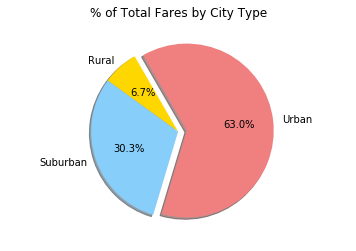

In [15]:
# In addition, you will be expected to produce the following three pie charts:

# % of Total Fares by City Type
cityType = mergedDF.groupby(['type'])
fareType = cityType['fare'].sum()
fareType
cityTypeFares = pd.DataFrame({"Fares": fareType})
cityTypeFares = cityTypeFares.reset_index()
typeLabels = cityTypeFares['type']
typeSizes = cityTypeFares['Fares']
colors = ['gold','lightskyblue','lightcoral']
explode =[0,0,.1]
plt.axis("equal")
plt.title("% of Total Fares by City Type")

plt.pie(typeSizes, explode=explode, labels=typeLabels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.show()

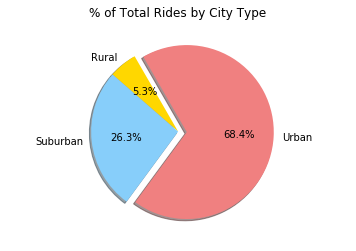

In [16]:
# % of Total Rides by City Type
rideCount = cityType['fare'].count()
rideCount
cityTypeRide = pd.DataFrame({"Ride Count": rideCount})
cityTypeRide = cityTypeRide.reset_index()
rideLabels = cityTypeRide['type']
rideSizes = cityTypeRide['Ride Count']
colors = ['gold','lightskyblue','lightcoral']
explode =[0,0,.1]
plt.axis("equal")
plt.title("% of Total Rides by City Type")

plt.pie(rideSizes, explode=explode, labels=rideLabels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.show()

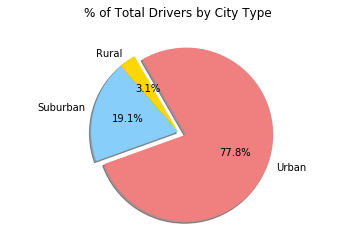

In [17]:
# % of Total Drivers by City Type
driverType = cityDF.groupby(['type'])
driverCount = driverType['driver_count'].sum()
driverCount
driverTypeDF = pd.DataFrame({"Driver Count": driverCount})
driverTypeDF = driverTypeDF.reset_index()
driverLabels = driverTypeDF['type']
driverSizes = driverTypeDF['Driver Count']
colors = ['gold','lightskyblue','lightcoral']
explode =[0,0,.1]
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

plt.pie(driverSizes, explode=explode, labels=driverLabels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.show()